<a href="https://colab.research.google.com/github/mubasshar009/Awesome-Mobile-Machine-Learning/blob/master/Apple2Orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mubasharhassan","key":"ccb389ba2991cb7c06a78b4ebcc93ee6"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d balraj98/apple2orange-dataset

apple2orange-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!ls


 apple2orange-dataset.zip  'kaggle (1).json'   sample_data
 files			    kaggle.json


In [6]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/apple2orange-dataset.zip','r')
zip_ref.extractall('files')
zip_ref.close()

In [7]:
!mkdir ./files/Testing
!mv ./files/testA ./files/Testing
!mv ./files/testB ./files/Testing

!mkdir ./files/Training
!mv ./files/trainA ./files/Training
!mv ./files/trainB ./files/Training



mkdir: cannot create directory ‘./files/Testing’: File exists
mv: cannot move './files/testA' to './files/Testing/testA': Directory not empty
mv: cannot move './files/testB' to './files/Testing/testB': Directory not empty
mkdir: cannot create directory ‘./files/Training’: File exists
mv: cannot move './files/trainA' to './files/Training/trainA': Directory not empty
mv: cannot move './files/trainB' to './files/Training/trainB': Directory not empty


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [11]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr =0.0001),
              metrics = ['acc'])


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
#train_datagen = train_datagen.astype('float32')
#test_datagen = test_datagen.astype('float32')
train_generator = train_datagen.flow_from_directory(
    '/content/files/Training',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary',
    
)

validation_generator = test_datagen.flow_from_directory(
    '/content/files/Testing',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2014 images belonging to 2 classes.
Found 514 images belonging to 2 classes.


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch = 50,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 25

)

Epoch 1/15
50/50 [==============================] - 6s 65ms/step - loss: 0.6097 - acc: 0.6503 - val_loss: 0.3296 - val_acc: 0.8780
Epoch 2/15
50/50 [==============================] - 3s 61ms/step - loss: 0.3565 - acc: 0.8324 - val_loss: 0.3075 - val_acc: 0.8620
Epoch 3/15
50/50 [==============================] - 3s 61ms/step - loss: 0.3198 - acc: 0.8681 - val_loss: 0.3747 - val_acc: 0.8380
Epoch 4/15
50/50 [==============================] - 3s 60ms/step - loss: 0.2019 - acc: 0.9196 - val_loss: 0.2202 - val_acc: 0.9200
Epoch 5/15
50/50 [==============================] - 3s 61ms/step - loss: 0.1949 - acc: 0.9312 - val_loss: 0.2068 - val_acc: 0.9360
Epoch 6/15
50/50 [==============================] - 3s 60ms/step - loss: 0.1773 - acc: 0.9421 - val_loss: 0.2157 - val_acc: 0.9160
Epoch 7/15
50/50 [==============================] - 3s 60ms/step - loss: 0.1981 - acc: 0.9276 - val_loss: 0.2096 - val_acc: 0.9280
Epoch 8/15
50/50 [==============================] - 3s 60ms/step - loss: 0.1690 - a

In [26]:
model.save('apple2orange.h5')

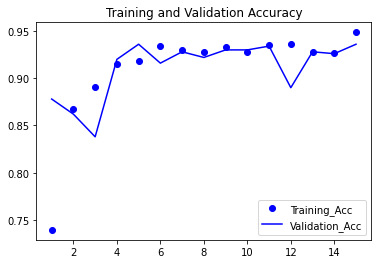

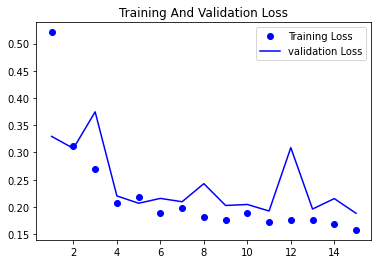

In [14]:
import matplotlib.pyplot as plt
import numpy as np
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(1,len(acc) + 1)
plt.plot(epochs,acc,'bo',label = 'Training_Acc')
plt.plot(epochs,val_acc,'b',label = "Validation_Acc")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label = 'Training Loss')
plt.plot(epochs,val_loss ,'b',label = 'validation Loss')
plt.title("Training And Validation Loss")
plt.legend()
plt.show()